# Missing Data Handling
# Feature Encoding
## Akash patil
### aakashgolu1008@gmail.com


Why are their Missing values?? Survey--Depression Survey

They hesitate to put down the information <br>
Survey informations are not that valid <br>
Men--salary <br>
Women---age <br>
People may have died----NAN <br>
Data Science Projects---Dataset should be collected from multiple sources

<h3>What are the different types of Missing Data?</h3>
<h4>Missing Completely at Random, MCAR:</h4>
<p> A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Guru\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Guru\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Guru\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('H:\data science\machine learning/Titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df[df['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [6]:
# df[df['deck'].isnull()]

In [7]:
df.iloc[61]

survived            1
pclass              1
sex            female
age              38.0
sibsp               0
parch               0
fare             80.0
embarked          NaN
class           First
who             woman
adult_male      False
deck                B
embark_town       NaN
alive             yes
alone            True
Name: 61, dtype: object

In [8]:
df.rename(columns={'deck':'cabin'},inplace=True)

In [9]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'cabin', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
df['cabin_null']=np.where(df['cabin'].isnull(),1,0)

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,cabin,embark_town,alive,alone,cabin_null
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [12]:
#define the percentage of null values
df['cabin_null'].mean()

0.7721661054994389

In [13]:
# survived(1) or non survuved(0)
df.groupby(['survived'])['cabin_null'].mean()

survived
0    0.877960
1    0.602339
Name: cabin_null, dtype: float64

In [14]:
df.groupby(['survived']).mean()

C:\Users\Guru\AppData\Local\Temp\ipykernel_10320\131671502.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['survived']).mean()


,pclass,age,sibsp,parch,fare,adult_male,alone,cabin_null
survived,,,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,0.817851,0.681239,0.877960
1,1.950292,28.343690,0.473684,0.464912,48.395408,0.257310,0.476608,0.602339


#### Missing At Random(MAR)

Men---hide their salary <br>
Women---hide their age

##### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

# 1.Mean/ MEdian /Mode imputation
( most frequently used)<br>
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [15]:
Ti=pd.read_csv('H:\data science\machine learning/Titanic.csv',usecols=['age','fare','survived'])
Ti.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
#percentage of missing values 
Ti.isnull().mean()*100

survived     0.00000
age         19.86532
fare         0.00000
dtype: float64

In [17]:
def impute_nan(Ti,variable,median):
    Ti[variable+'_median']=Ti[variable].fillna(median)

In [18]:
median=Ti.age.median()
median

28.0

In [19]:
impute_nan(Ti,'age',median)
Ti.head()

,survived,age,fare,age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [20]:
print(Ti['age'].std())
print(Ti['age_median'].std())

14.526497332334042
13.019696550973201


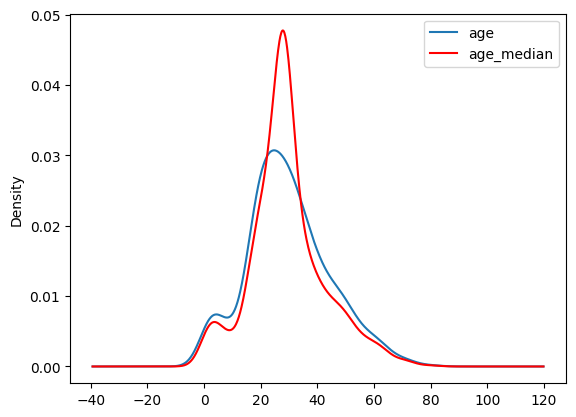

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111)
Ti["age"].plot(kind='kde',ax=ax)
Ti["age_median"].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

## Advantages And Disadvantages of Mean/Median Imputation
### Advantages
- Easy to implement(Robust to outliers)
- Faster way to obtain the complete dataset

### Disadvantages
- Change or Distortion in the original variance
- Impacts Correlation

# 2. random sample imputation  
( most frequently used)

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [22]:
df=pd.read_csv('H:\data science\machine learning/Titanic.csv', usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [24]:
# for percentage
df.isnull().mean()*100

survived     0.00000
age         19.86532
fare         0.00000
dtype: float64

In [25]:
df['age'].isnull().sum()

177

In [26]:
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=2)

471    38.0
542    11.0
719    33.0
137    37.0
654    18.0
       ... 
429    32.0
586    47.0
789    46.0
746    16.0
836    21.0
Name: age, Length: 177, dtype: float64

In [27]:
df[df['age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [28]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [29]:
median=df.age.median()

In [30]:
impute_nan(df,"age",median)

In [31]:
df.head()

,survived,age,fare,age_median,age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [32]:
random_sample=df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)
random_sample.index=df[df['age'].isnull()].index
random_sample


5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: age, Length: 177, dtype: float64

In [33]:
df['fare'].loc[df['age'].isnull()]

5       8.4583
17     13.0000
19      7.2250
26      7.2250
28      7.8792
        ...   
859     7.2292
863    69.5500
868     9.5000
878     7.8958
888    23.4500
Name: fare, Length: 177, dtype: float64

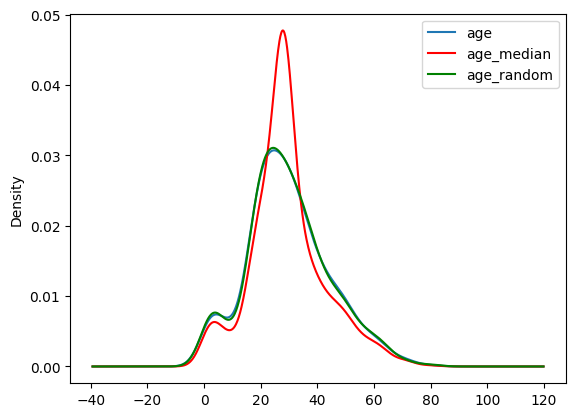

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
df.age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages
- Easy To implement
- There is less distortion in variance

### Disadvantage
- Every situation randomness wont work

# 3. Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [35]:
df=pd.read_csv('H:\data science\machine learning/Titanic.csv', usecols=['age','fare','survived'])
df

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [36]:
df['age_NAN']=np.where(df['age'].isnull(),1,0)
df.head()

,survived,age,fare,age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [37]:
df.age.median() #mean or median 

28.0

In [38]:
df['age'].fillna(df.age.median(),inplace=True)
df

,survived,age,fare,age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


## Advantages
- Easy to implement
- Captures the importance of missing values

## Disadvantages
- Creating Additional Features(Curse of Dimensionality)

# 4. End of Distribution imputation

It works well if the data are not missing completely at random (not work every where)

In [39]:
df=pd.read_csv('H:\data science\machine learning/Titanic.csv', usecols=['age','fare','survived'])
df

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


<AxesSubplot: >

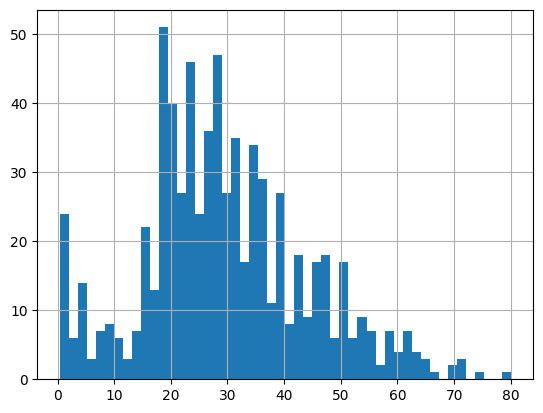

In [40]:
df.age.hist(bins=50)

In [41]:
df.age.mean()

29.69911764705882

In [42]:
extreme=df.age.mean() + 3*df.age.std() #outside of 3rd std. normal distribution 
extreme

73.27860964406094

<AxesSubplot: >

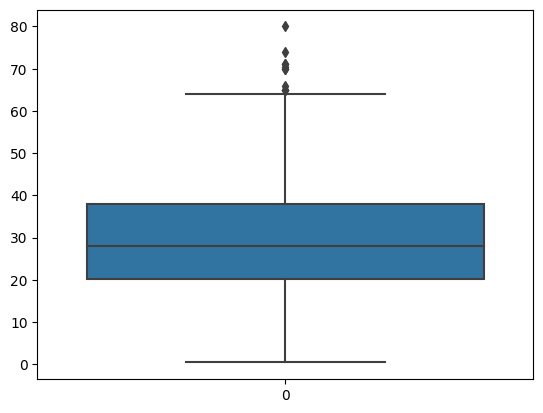

In [43]:
sns.boxplot(df['age'])


In [44]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [45]:
median=df['age'].median()

In [46]:
impute_nan(df,'age',median,extreme)

In [47]:
df

,survived,age,fare,age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


<AxesSubplot: >

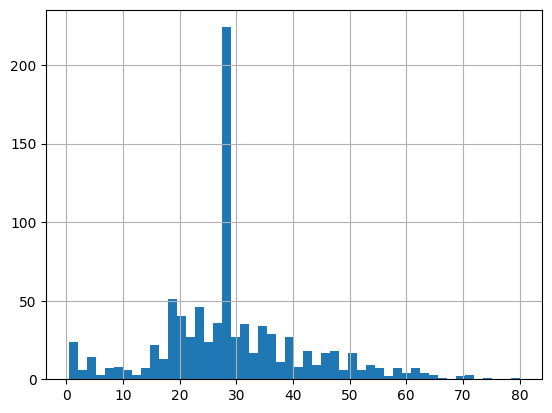

In [48]:
df['age'].hist(bins=50)

<AxesSubplot: >

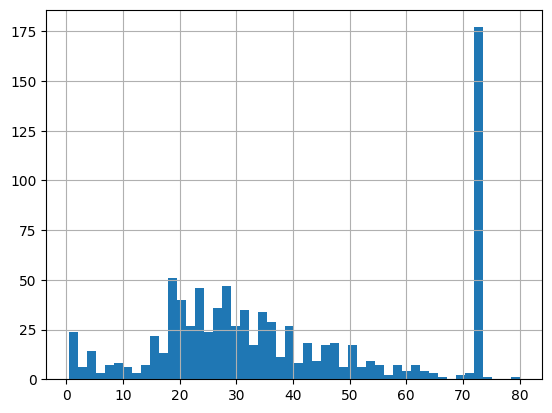

In [49]:
df['age_end_distribution'].hist(bins=50)

<AxesSubplot: >

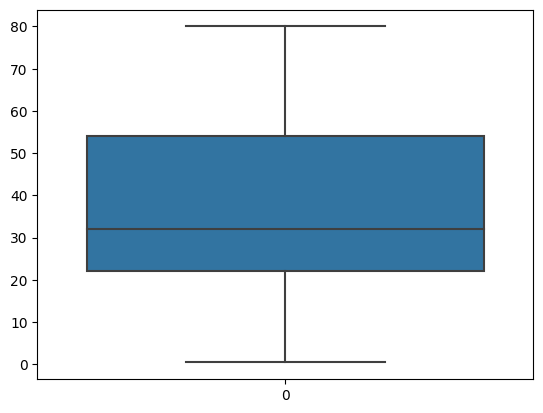

In [50]:
sns.boxplot(df['age_end_distribution'])

# 4. Arbitrary Value Imputation

this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value (not work every where)

In [51]:
df=pd.read_csv('H:\data science\machine learning/Titanic.csv', usecols=['age','fare','survived'])
df

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [52]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot: >

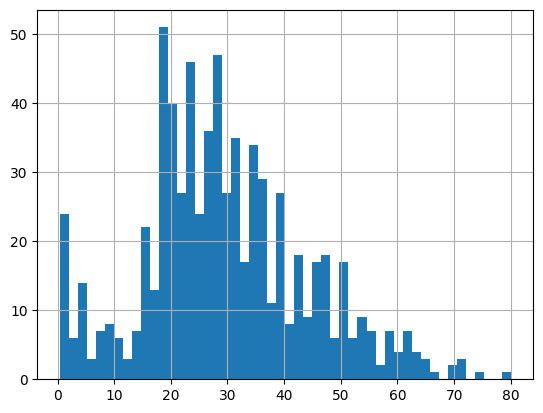

In [53]:
df['age'].hist(bins=50)


## Advantages
- Easy to implement
- Captures the importance of missingess if there is one

## Disadvantages
- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

## How To Handle Categroical Missing Values
# Frequent Category Imputation

In [54]:
df=pd.read_csv('loan.csv' )
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [56]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'] )
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [57]:
(df.isnull().mean()*100).sort_values(ascending=True)

SalePrice       0.000000
BsmtQual        2.534247
GarageType      5.547945
FireplaceQu    47.260274
dtype: float64

In [58]:
df.isnull().sum()


BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

## Compute the frequency with every feature

In [59]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot: >

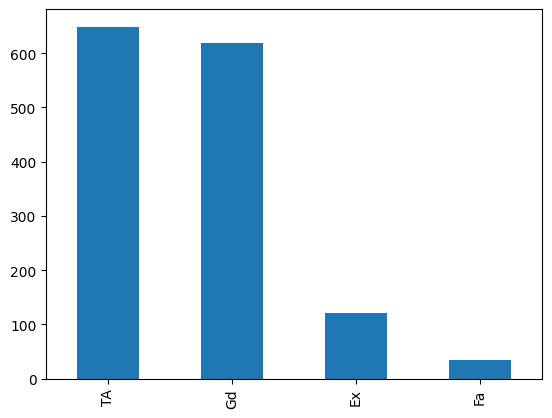

In [60]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot: >

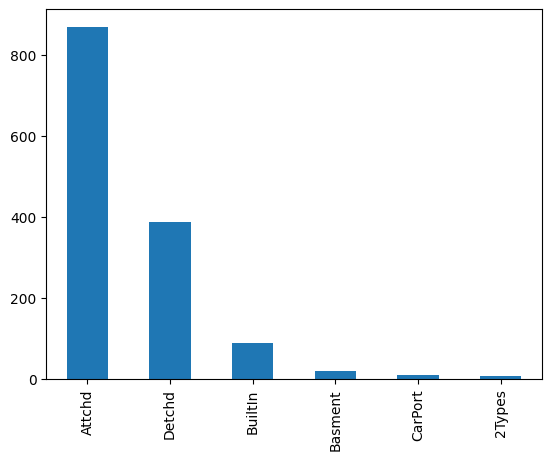

In [61]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot: >

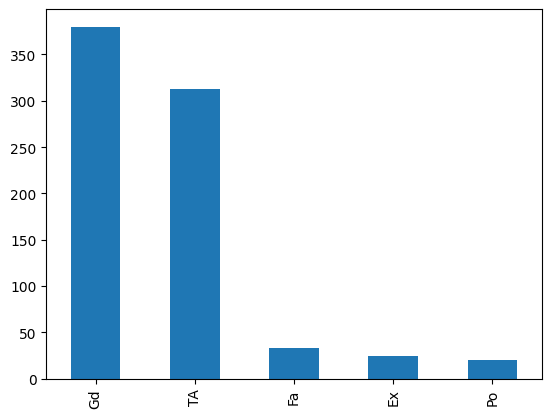

In [62]:
df['FireplaceQu'].value_counts().plot.bar()

In [63]:
df['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [64]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [65]:
df['GarageType'].mode()[0]

'Attchd'

In [66]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [67]:
for features in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,features)

In [68]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### you can also use mode insted of this above steps

in FireplaceQu there are 47% data is missing so this is not good way to fillna 

if missing value is high then this is not good

## Advantages
- Easy To implement
- Faster way to implement

## Disadvantages
- Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
- It distorts the relation of the most frequent label

# Adding a variable to capture NAN

In [69]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [70]:
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [71]:
frequent=df['BsmtQual'].mode()[0]

In [72]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [73]:
df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [74]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [75]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0
1456,Gd,TA,Attchd,210000,0,0
1457,TA,Gd,Attchd,266500,0,0
1458,TA,Gd,Attchd,142125,0,1


## Suppose if you have more frequent categories, we just replace NAN with a new category

In [76]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [77]:
def impute_nan(df,variable): 
    df[variable+ "_newvar"]=np.where(df[variable].isnull(),'missing',df[variable]) # "_newvar" is not required just for understanding, just write df[variable]

In [78]:
for features in ['BsmtQual','GarageType','FireplaceQu']:  
    impute_nan(df,features)
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,GarageType_newvar,FireplaceQu_newvar
0,Gd,NaN,Attchd,208500,Gd,Attchd,missing
1,Gd,TA,Attchd,181500,Gd,Attchd,TA
2,Gd,TA,Attchd,223500,Gd,Attchd,TA
3,TA,Gd,Detchd,140000,TA,Detchd,Gd
4,Gd,TA,Attchd,250000,Gd,Attchd,TA
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd,Attchd,TA
1456,Gd,TA,Attchd,210000,Gd,Attchd,TA
1457,TA,Gd,Attchd,266500,TA,Attchd,Gd
1458,TA,NaN,Attchd,142125,TA,Attchd,missing


In [79]:
df=df.drop(['BsmtQual','GarageType','FireplaceQu'],axis=1)

In [80]:
df

,SalePrice,BsmtQual_newvar,GarageType_newvar,FireplaceQu_newvar
0,208500,Gd,Attchd,missing
1,181500,Gd,Attchd,TA
2,223500,Gd,Attchd,TA
3,140000,TA,Detchd,Gd
4,250000,Gd,Attchd,TA
...,...,...,...,...
1455,175000,Gd,Attchd,TA
1456,210000,Gd,Attchd,TA
1457,266500,TA,Attchd,Gd
1458,142125,TA,Attchd,missing


# - ___Handling Categorical Feature___

## handle categorical feture

### 1. one hot encoding

In [81]:
df=pd.read_csv('H:\data science\machine learning/Titanic.csv' ,usecols=['sex'])
df.sample(10,random_state=0)

,sex
495,male
648,male
278,male
31,female
255,female
298,male
609,female
318,female
484,male
367,female


In [82]:
pd.get_dummies(df).sample(10,random_state=0)

,sex_female,sex_male
495,0,1
648,0,1
278,0,1
31,1,0
255,1,0
298,0,1
609,1,0
318,1,0
484,0,1
367,1,0


In [83]:
pd.get_dummies(df,drop_first=True).sample(10,random_state=0) # one column IS droping, another one columns shows the either 1 or 0

,sex_male
495,1
648,1
278,1
31,0
255,0
298,1
609,0
318,0
484,1
367,0


In [84]:
df=pd.read_csv('H:\data science\machine learning/Titanic.csv' ,usecols=['embarked'])
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [85]:
pd.get_dummies(df,drop_first=True).sample(10,random_state=0) #

,embarked_Q,embarked_S
495,0,0
648,0,1
278,1,0
31,0,0
255,0,0
298,0,1
609,0,1
318,0,1
484,0,0
367,0,0


#### Onehotencoding with many categories in a feature


In [86]:
df=pd.read_csv('mercedes.csv')
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df=pd.read_csv('mercedes.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [88]:
#value counts in each columns 
for i in df.columns:
    print(len(df[i].value_counts()))

47
27
44
7
4
29
12


In [89]:
df.X1.value_counts().head(10) # add sort_values or not 

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [90]:
lst_10=df.X1.value_counts().head(10).index
lst_10=list(lst_10)

In [91]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [92]:
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [94]:
df[['X1']+ lst_10]

,X1,aa,s,b,l,v,r,i,a,c,o
0,v,0,0,0,0,1,0,0,0,0,0
1,t,0,0,0,0,0,0,0,0,0,0
2,w,0,0,0,0,0,0,0,0,0,0
3,t,0,0,0,0,0,0,0,0,0,0
4,v,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4204,s,0,1,0,0,0,0,0,0,0,0
4205,o,0,0,0,0,0,0,0,0,0,1
4206,v,0,0,0,0,1,0,0,0,0,0
4207,r,0,0,0,0,0,1,0,0,0,0


## 2. Ordinal Number Encoding

In [95]:
import datetime

In [96]:
today_date=datetime.datetime.today()

In [97]:
today_date

datetime.datetime(2023, 6, 17, 19, 38, 35, 806996)

In [101]:
today_date-datetime.timedelta(2) # substracting 2 days from today date 

datetime.datetime(2023, 6, 15, 19, 38, 35, 806996)

In [103]:
### list comprehension
days=[today_date - datetime.timedelta(x) for x in range(0,15)]

In [105]:
data=pd.DataFrame(days)
data.columns=['day']
data

,day
0,2023-06-17 19:38:35.806996
1,2023-06-16 19:38:35.806996
2,2023-06-15 19:38:35.806996
3,2023-06-14 19:38:35.806996
4,2023-06-13 19:38:35.806996
5,2023-06-12 19:38:35.806996
6,2023-06-11 19:38:35.806996
7,2023-06-10 19:38:35.806996
8,2023-06-09 19:38:35.806996
9,2023-06-08 19:38:35.806996


In [115]:
data['weekday']=data['day'].dt.day_name()

In [116]:
data

,day,weekday
0,2023-06-17 19:38:35.806996,Saturday
1,2023-06-16 19:38:35.806996,Friday
2,2023-06-15 19:38:35.806996,Thursday
3,2023-06-14 19:38:35.806996,Wednesday
4,2023-06-13 19:38:35.806996,Tuesday
5,2023-06-12 19:38:35.806996,Monday
6,2023-06-11 19:38:35.806996,Sunday
7,2023-06-10 19:38:35.806996,Saturday
8,2023-06-09 19:38:35.806996,Friday
9,2023-06-08 19:38:35.806996,Thursday


In [122]:
dictionary=dict([('Monday',1),('Tuesday',2),('Wednesday',3),('Thursday',4),('Friday',5),('Saturday',6),('Sunday',7)])

In [123]:
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [125]:
data['weekday_ordianl']=data['weekday'].map(dictionary)

In [126]:
data

,day,weekday,weekday_ordianl
0,2023-06-17 19:38:35.806996,Saturday,6
1,2023-06-16 19:38:35.806996,Friday,5
2,2023-06-15 19:38:35.806996,Thursday,4
3,2023-06-14 19:38:35.806996,Wednesday,3
4,2023-06-13 19:38:35.806996,Tuesday,2
5,2023-06-12 19:38:35.806996,Monday,1
6,2023-06-11 19:38:35.806996,Sunday,7
7,2023-06-10 19:38:35.806996,Saturday,6
8,2023-06-09 19:38:35.806996,Friday,5
9,2023-06-08 19:38:35.806996,Thursday,4


## 3. count or frequency Encoding

In [156]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [157]:
train_set[1].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: 1, dtype: int64

In [158]:
columns=[1,3,5,6,7,8,9,13]

In [159]:
train_set=train_set[columns]

In [160]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [161]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [162]:
for feature in train_set.columns:
    print(feature, ':', len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [163]:
country_map=train_set['Country'].value_counts().to_dict() #to_dict()
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [164]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


In [166]:
train_set.loc[11]

Employment               State-gov
Degree                   Bachelors
Status          Married-civ-spouse
Designation         Prof-specialty
family_job                 Husband
Race            Asian-Pac-Islander
Sex                           Male
Country                        100
Name: 11, dtype: object

## Advantages
- Easy To Use
- Not increasing feature space

## Disadvantages
It will provide same weight if the frequencies are same

## 4. Target Guided Ordinal Encoding

- Ordering the labels according to the target
- Replace the labels by the joint probability of being 1 or 0

In [169]:
df=pd.read_csv('H:\data science\machine learning/Titanic.csv', usecols=['deck','survived'])
df.head()

,survived,deck
0,0,NaN
1,1,C
2,1,NaN
3,1,C
4,0,NaN


In [171]:
df['deck'].fillna('Missing',inplace=True)


In [172]:
df

,survived,deck
0,0,Missing
1,1,C
2,1,Missing
3,1,C
4,0,Missing
...,...,...
886,0,Missing
887,1,B
888,0,Missing
889,1,C


In [173]:
# selecting only first letter from any columns here in other dataset in titanic deck=cabin C28
# df['Cabin']=df['Cabin'].astype(str).str[0]

In [176]:
df['deck']=df['deck'].astype(str).str[0]

In [177]:
df

,survived,deck
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
...,...,...
886,0,M
887,1,B
888,0,M
889,1,C


In [179]:
df.deck.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [182]:
df.groupby(['deck'])['survived'].mean()

deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299419
Name: survived, dtype: float64

In [185]:
ordinal_labels=df.groupby(['deck'])['survived'].mean().sort_values().index
ordinal_labels

Index(['M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='deck')

In [187]:
enumerate(ordinal_labels,0)


In [188]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'M': 0, 'A': 1, 'G': 2, 'C': 3, 'F': 4, 'B': 5, 'E': 6, 'D': 7}

In [189]:
df['deck_ordinal_labels']=df['deck'].map(ordinal_labels2)
df.head()

,survived,deck,deck_ordinal_labels
0,0,M,0
1,1,C,3
2,1,M,0
3,1,C,3
4,0,M,0


## 5. Mean Encoding

In [191]:
mean_ordinal=df.groupby(['deck'])['survived'].mean().to_dict()

In [192]:
df['mean_ordinal_encode']=df['deck'].map(mean_ordinal)
df.head()

,survived,deck,deck_ordinal_labels,mean_ordinal_encode
0,0,M,0,0.299419
1,1,C,3,0.593220
2,1,M,0,0.299419
3,1,C,3,0.593220
4,0,M,0,0.299419
